In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.width', 1000)

In [2]:
from ClusterFunctions import print_boxplots

In [3]:
caracteristics=pd.read_csv('caracteristics.csv', encoding='latin-1')
caracteristics.reindex()
caracteristics

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col    com                       adr  gps  lat long  dep
0       201600000001  16     2     1  1445    1    2    1  8.0  3.0    5.0        46, rue Sonneville    M  0.0    0  590
1       201600000002  16     3    16  1800    1    2    6  1.0  6.0    5.0       1a rue du cimetière    M  0.0    0  590
2       201600000003  16     7    13  1900    1    1    1  1.0  6.0   11.0                       NaN    M  0.0    0  590
3       201600000004  16     8    15  1930    2    2    1  7.0  3.0  477.0        52 rue victor hugo    M  0.0    0  590
4       201600000005  16    12    23  1100    1    2    3  1.0  3.0   11.0          rue Joliot curie    M  0.0    0  590
...              ...  ..   ...   ...   ...  ...  ...  ...  ...  ...    ...                       ...  ...  ...  ...  ...
839980  200500087950   5    12    21  2035    5    2    2  1.0  3.0  416.0   sans, LEBLOND(RUE M. ET  NaN  NaN  NaN  974
839981  200500087951   5    12    23  1010    1    2    1  1.0  3.0  416.0  SANS, PRESIDENT MITTERAN  NaN  NaN  NaN  974
839982  200500087952   5    12    26  1715    1    2    2  1.0  3.0  416.0   SANS, LEBLOND(RUE M. ET  NaN  NaN  NaN  974
839983  200500087953   5    12    27  1500    1    2    3  2.0  5.0  416.0  SANS, HUBERT DE LISLE(BO  NaN  NaN  NaN  974
839984  200500087954   5    12    31  2100    5    2    1  2.0  7.0  414.0                      RN01  NaN  NaN  NaN  974

[839985 rows x 16 columns]

In [4]:
caracteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


In [5]:
caracteristics.dropna(inplace=True)
caracteristics

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col    com                      adr gps  lat long  dep
0       201600000001  16     2     1  1445    1    2    1  8.0  3.0    5.0       46, rue Sonneville   M  0.0    0  590
1       201600000002  16     3    16  1800    1    2    6  1.0  6.0    5.0      1a rue du cimetière   M  0.0    0  590
3       201600000004  16     8    15  1930    2    2    1  7.0  3.0  477.0       52 rue victor hugo   M  0.0    0  590
4       201600000005  16    12    23  1100    1    2    3  1.0  3.0   11.0         rue Joliot curie   M  0.0    0  590
5       201600000006  16    12    23  1115    1    2    1  7.0  6.0   11.0  Rue Jean-baptiste LEBAS   M  0.0    0  590
...              ...  ..   ...   ...   ...  ...  ...  ...  ...  ...    ...                      ...  ..  ...  ...  ...
839566  200500087531   5    12     2  1230    1    1    3  1.0  3.0  309.0     BP 134 Cité Cabassou   G  0.0    0  973
839569  200500087537   5    12     6  1700    1    2    1  1.0  6.0  304.0       Quartier de l'Anse   G  0.0    0  973
839570  200500087538   5    12    19  1410    1    1    1  1.0  1.0  304.0                    PK 48   G  0.0    0  973
839571  200500087539   5    12    22  1915    2    2    1  1.0  3.0  415.0    Rue Gabriel Guist'hau   R  0.0    0  974
839572  200500087540   5    12    10  1900    2    2    1  1.0  1.0  416.0  RD 38 rte Ligne Paradis   R  0.0    0  974

[223493 rows x 16 columns]

In [6]:
caracteristics.describe(include='all')

Num_Acc             an           mois           jour           hrmn            lum            agg            int            atm            col            com     adr     gps           lat      long            dep
count   2.234930e+05  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493.000000  223493  223493  2.234930e+05  223493.0  223493.000000
unique           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN  156751       9           NaN  116350.0            NaN
top              NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN      A4       M           NaN       0.0            NaN
freq             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN    1005  216574           NaN   44780.0            NaN
mean    2.011772e+11      11.772136       6.583754      15.556957    1387.027773       1.901299       1.773443       1.733598       1.542603       4.128921     196.355157     NaN     NaN  3.277844e+06       NaN     526.958106
std     3.371611e+08       3.371662       3.380630       8.762770     535.366688       1.522132       0.418605       1.594964       1.591858       2.006971     170.049420     NaN     NaN  2.149108e+06       NaN     284.559494
min     2.005000e+11       5.000000       1.000000       1.000000       1.000000       1.000000       1.000000       0.000000       1.000000       1.000000       1.000000     NaN     NaN  0.000000e+00       NaN      10.000000
25%     2.009001e+11       9.000000       4.000000       8.000000    1008.000000       1.000000       2.000000       1.000000       1.000000       3.000000      55.000000     NaN     NaN  4.000000e+00       NaN     300.000000
50%     2.012000e+11      12.000000       7.000000      15.000000    1500.000000       1.000000       2.000000       1.000000       1.000000       3.000000     149.000000     NaN     NaN  4.504770e+06       NaN     510.000000
75%     2.015000e+11      15.000000      10.000000      23.000000    1810.000000       2.000000       2.000000       2.000000       1.000000       6.000000     282.000000     NaN     NaN  4.852889e+06       NaN     770.000000
max     2.016001e+11      16.000000      12.000000      31.000000    2359.000000       5.000000       2.000000       9.000000       9.000000       7.000000     952.000000     NaN     NaN  5.564823e+06       NaN     976.000000

In [7]:
caracteristics['long']=caracteristics['long'].apply(pd.to_numeric,errors='ignore')
object_types=caracteristics['long'].apply(type)

In [8]:
indices = [i for i, x in enumerate(list(object_types)) if x == str]
len(indices)

2202

In [9]:
caracteristics.drop(caracteristics.index[indices], inplace=True)

In [10]:
caracteristics['long']=caracteristics['long'].apply(pd.to_numeric,errors='ignore')
caracteristics['long']=caracteristics['long'].div(100000)
caracteristics['lat']=caracteristics['lat'].div(100000)
caracteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221291 entries, 0 to 839572
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  221291 non-null  int64  
 1   an       221291 non-null  int64  
 2   mois     221291 non-null  int64  
 3   jour     221291 non-null  int64  
 4   hrmn     221291 non-null  int64  
 5   lum      221291 non-null  int64  
 6   agg      221291 non-null  int64  
 7   int      221291 non-null  int64  
 8   atm      221291 non-null  float64
 9   col      221291 non-null  float64
 10  com      221291 non-null  float64
 11  adr      221291 non-null  object 
 12  gps      221291 non-null  object 
 13  lat      221291 non-null  float64
 14  long     221291 non-null  float64
 15  dep      221291 non-null  int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 28.7+ MB


In [11]:
caracteristics.describe(include='all')

Num_Acc             an           mois           jour           hrmn            lum            agg            int            atm            col            com     adr     gps            lat           long            dep
count   2.212910e+05  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291.000000  221291  221291  221291.000000  221291.000000  221291.000000
unique           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN  155148       9            NaN            NaN            NaN
top              NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN      A4       M            NaN            NaN            NaN
freq             NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN    1005  214372            NaN            NaN            NaN
mean    2.011800e+11      11.799721       6.582125      15.557167    1386.850143       1.901447       1.772621       1.732343       1.541581       4.129427     195.788351     NaN     NaN      33.104605       1.845747     527.091016
std     3.376930e+08       3.376980       3.380758       8.761904     535.480250       1.521912       0.419141       1.594619       1.590445       2.007123     169.974889     NaN     NaN      21.346301       4.229032     285.433025
min     2.005000e+11       5.000000       1.000000       1.000000       1.000000       1.000000       1.000000       0.000000       1.000000       1.000000       1.000000     NaN     NaN       0.000000      -5.246000      10.000000
25%     2.009001e+11       9.000000       4.000000       8.000000    1005.000000       1.000000       2.000000       1.000000       1.000000       3.000000      55.000000     NaN     NaN       0.000040       0.000000     300.000000
50%     2.012000e+11      12.000000       7.000000      15.000000    1500.000000       1.000000       2.000000       1.000000       1.000000       3.000000     149.000000     NaN     NaN      45.155100       1.113000     510.000000
75%     2.015000e+11      15.000000      10.000000      23.000000    1810.000000       2.000000       2.000000       2.000000       1.000000       6.000000     281.000000     NaN     NaN      48.553295       3.223210     770.000000
max     2.016001e+11      16.000000      12.000000      31.000000    2359.000000       5.000000       2.000000       9.000000       9.000000       7.000000     952.000000     NaN     NaN      55.648230      61.568770     976.000000

# Filter data

In [12]:
idx = np.where((caracteristics['lat']>=48) & (caracteristics['lat']<=49.5) & (caracteristics['long']<=3.5) & (caracteristics['long']>1.5))

In [13]:
filtered_data=caracteristics.iloc[idx]
filtered_data

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col    com                       adr gps       lat     long  dep
362     201600000363  16     2    19  1845    5    2    1  1.0  6.0  602.0             Rue du 7° BCA   M  49.48930  3.44609   20
402     201600000403  16    11    19   600    3    2    1  1.0  6.0   71.0      21 rue du pont araby   M  49.41023  3.13601   20
410     201600000411  16     4    18   815    1    2    1  1.0  6.0  810.0       AVENUE DE COMPIEGNE   M  49.25664  3.08494   20
411     201600000412  16     5     1  1445    1    2    1  1.0  3.0  307.0          2, rue de verdun   M  49.17802  3.12734   20
437     201600000438  16     6     9  1615    1    2    1  1.0  2.0  628.0  rue du général de gaulle   M  49.42011  2.15253  600
...              ...  ..   ...   ...   ...  ...  ...  ...  ...  ...    ...                       ...  ..       ...      ...  ...
832402  200500079444   5    12     2   830    1    2    1  2.0  6.0  584.0          LE PETIT THERAIN   M  49.24000  2.44000  600
832417  200500079459   5    12    21  1715    3    1    3  8.0  1.0  580.0   Carrefour les Guepelles   M  49.09100  2.55200  950
832543  200500079585   5    12    10  1915    5    2    1  1.0  3.0  353.0       RN1/RUE DE BEAUMONT   M  49.08700  2.31500  950
832581  200500079623   5    12    22   530    3    1    1  1.0  6.0  399.0                 PK 69+800   M  48.25000  3.35300  890
832623  200500079665   5    12     8  1830    5    2    1  2.0  1.0  134.0               rue pasteur   M  49.14100  2.24800  950

[34220 rows x 16 columns]

In [14]:
coords = filtered_data[['lat','long']]

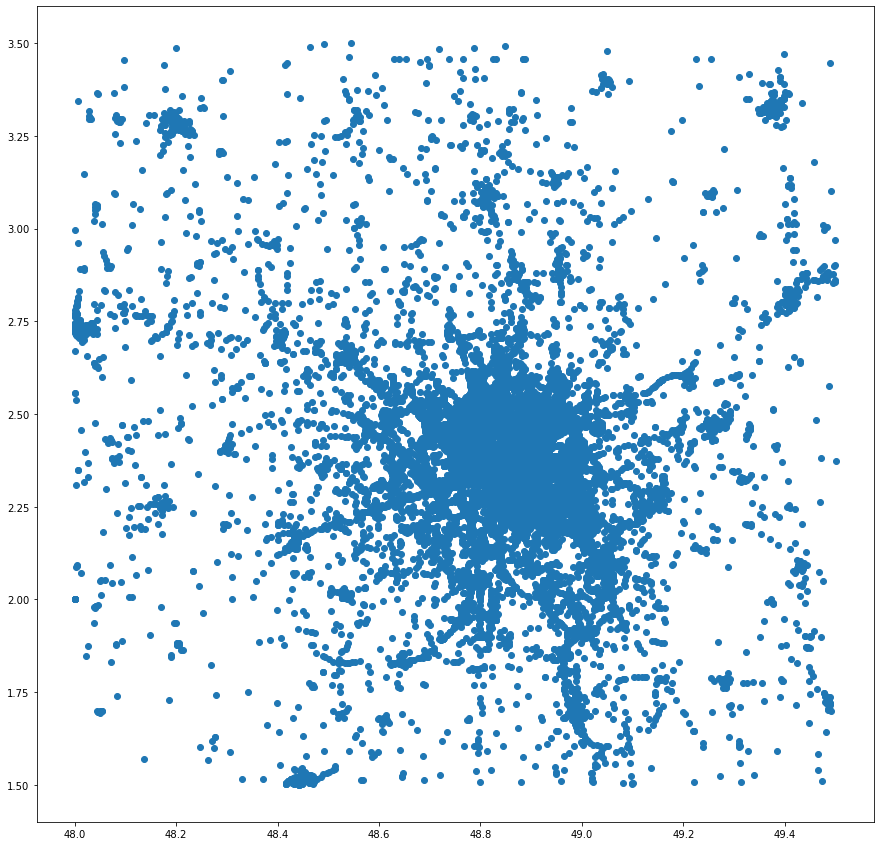

In [15]:
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(filtered_data['lat'], filtered_data['long'])
plt.show() 

In [16]:
import folium

In [17]:
f = folium.Figure(width=1300, height=800)
map_ = folium.Map(location=[48.750, 2.25], zoom_start=9,control_scale=True,
zoom_control=False).add_to(f)

loc_list = coords.values.tolist()
feature_group = folium.FeatureGroup("Locations")
for point in range(0, 2000):
    folium.Marker([loc_list[point][0],loc_list[point][1]]).add_to(map_)

#map_

# DBSCAN


In [18]:
from sklearn.cluster import DBSCAN


In [19]:
coords_mat = coords.values

In [67]:
kms_per_radian = 6371.0088
epsilon = .03 / kms_per_radian
MIN_CLUSTER_SIZE=15

In [68]:

db = DBSCAN(eps=epsilon, min_samples=MIN_CLUSTER_SIZE, metric='haversine',n_jobs=-1).fit(np.radians(coords_mat))

In [69]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))-1
clusters = pd.Series([coords_mat[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 73


In [70]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

In [71]:
f = folium.Figure(width=1300, height=800)
map_ = folium.Map(location=[48.750, 2.25], zoom_start=10,control_scale=True,
zoom_control=False).add_to(f)

for index in range(num_clusters):
    for point in (clusters[index].tolist()):
        folium.Marker([point[0],point[1]],icon=folium.Icon(color=colors[index%len(colors)])).add_to(map_)

map_

In [72]:
clustered_data=pd.DataFrame(filtered_data)
clustered_data['cluster']=cluster_labels
clustered_data=clustered_data.loc[clustered_data['cluster'] >=0]
clustered_data

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col   com                       adr gps       lat     long  dep  cluster
41933   201600041934  16    11     4  2147    5    2    3  3.0  3.0  75.0        DAGORNO/PRIMEVERES   M  48.72750  2.53101  940        0
41939   201600041940  16     1     8  2030    5    2    3  1.0  3.0  75.0          TASSIGNY/DAGORNO   M  48.72750  2.53101  940        0
41962   201600041963  16    11    30  1415    1    2    3  1.0  1.0  75.0         TASSIGNY/TASSIGNY   M  48.72750  2.53101  940        0
41978   201600041979  16    12     8   702    5    1    3  1.0  1.0  75.0          TASSIGNY/DAGORNO   M  48.72750  2.53101  940        0
41986   201600041987  16    12    11  1330    1    2    3  8.0  3.0  75.0          TASSIGNY/DAGORNO   M  48.72750  2.53101  940        0
...              ...  ..   ...   ...   ...  ...  ...  ...  ...  ...   ...                       ...  ..       ...      ...  ...      ...
680471  200600010506   6     2    13  1045    1    2    1  1.0  2.0  28.0  FOCH(AVENUE DU MARECHAL)   M  48.77996  2.43784  940        2
684802  200600014837   6     3     4  1730    1    2    1  1.0  6.0  28.0  0, FOCH(AVENUE DU MARECH   M  48.78012  2.43793  940        2
684806  200600014841   6     3    13   820    1    2    2  1.0  6.0  28.0   HABETTE(AVENUE ET PLACE   M  48.78015  2.43799  940        2
684813  200600014848   6     3    20  2310    5    2    6  1.0  3.0  28.0      POMPADOUR(CARREFOUR)   M  48.77470  2.43928  940        1
684818  200600014853   6     3    25  1435    1    2    1  2.0  3.0  28.0   0, POMPADOUR(CARREFOUR)   M  48.77475  2.43935  940        1

[1782 rows x 17 columns]

In [73]:
places=pd.read_csv('places.csv')

In [74]:
places=places[['Num_Acc','voie']]
places['voie']=places['voie'].astype('int32',errors='ignore').astype('str',errors='ignore')

In [75]:
merged_clusterized = pd.merge(left=clustered_data, right=places, left_on='Num_Acc', right_on='Num_Acc')

In [76]:
merged_clusterized.describe(include='all')

Num_Acc           an         mois         jour         hrmn          lum          agg          int          atm          col          com           adr   gps          lat         long          dep      cluster  voie
count   1.782000e+03  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000  1782.000000          1782  1782  1782.000000  1782.000000  1782.000000  1782.000000  1782
unique           NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN           159     1          NaN          NaN          NaN          NaN    23
top              NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN  AUTOROUTE A3     M          NaN          NaN          NaN          NaN  86.0
freq             NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN           288  1782          NaN          NaN          NaN          NaN   386
mean    2.013386e+11    13.385522     6.106061    15.765432  1341.920314     1.859708     1.146465     1.296296     1.503367     4.145903    56.314815           NaN   NaN    48.855168     2.422532   934.225589    33.993827   NaN
std     1.847651e+08     1.847673     3.262858     8.959888   570.745885     1.400835     0.353671     1.032747     1.324727     1.810517    72.055863           NaN   NaN     0.073333     0.061552    21.064876    19.750535   NaN
min     2.006000e+11     6.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000           NaN   NaN    48.727500     2.242700   750.000000     0.000000   NaN
25%     2.012000e+11    12.000000     3.000000     8.000000   901.250000     1.000000     1.000000     1.000000     1.000000     3.000000    18.000000           NaN   NaN    48.788800     2.364463   930.000000    19.000000   NaN
50%     2.013000e+11    13.000000     6.000000    16.000000  1405.000000     1.000000     1.000000     1.000000     1.000000     4.000000    42.000000           NaN   NaN    48.867800     2.435920   940.000000    32.000000   NaN
75%     2.015000e+11    15.000000     9.000000    23.000000  1815.000000     3.000000     1.000000     1.000000     2.000000     6.000000    66.000000           NaN   NaN    48.921700     2.473620   940.000000    50.000000   NaN
max     2.016001e+11    16.000000    12.000000    31.000000  2355.000000     5.000000     2.000000     9.000000     9.000000     7.000000   527.000000           NaN   NaN    49.009500     2.539100   950.000000    72.000000   NaN

In [77]:
def filter_clusters_by_roadID(dataframe,min_cluster_size):
    clusters=dataframe['cluster'].unique()
    free_cluster=clusters.max()+1
  
    for cluster in clusters:
        streets=dataframe.loc[dataframe['cluster'] ==cluster]['voie'].unique()
        clu_numbers=list(range(free_cluster,free_cluster+len(streets)-1))
        clu_numbers.append(cluster)
        free_cluster+=len(streets)-1
        street_dict=dict(zip(streets,clu_numbers))
        for street, c in street_dict.items():
            dataframe['cluster']=np.where((dataframe['cluster']==cluster) & (dataframe['voie']==street), c, dataframe['cluster'])
        
    drop_cluster_dict=dataframe['cluster'].value_counts().ge(MIN_CLUSTER_SIZE).to_dict()
    dataframe=dataframe[dataframe['cluster'].replace(drop_cluster_dict).to_list()]

    return dataframe



In [78]:
len(merged_clusterized['cluster'].unique())

73

In [79]:
merged_clusterized=filter_clusters_by_roadID(merged_clusterized,MIN_CLUSTER_SIZE)

In [80]:
f = folium.Figure(width=1300, height=800)
map_ = folium.Map(location=[48.750, 2.25], zoom_start=10,control_scale=True,
zoom_control=False).add_to(f)

for cluster in merged_clusterized['cluster'].unique():
    for point in merged_clusterized.loc[merged_clusterized['cluster'] ==cluster][['lat','long','voie']].values.tolist():
        folium.Marker([point[0],point[1]],popup=point[2],icon=folium.Icon(color=colors[cluster%len(colors)])).add_to(map_)

map_

# Clusterization

In [82]:
from sklearn.cluster import KMeans


In [102]:
filtered_data
places=pd.read_csv('places.csv')
cluster_data=pd.merge(left=filtered_data, right=places, left_on='Num_Acc', right_on='Num_Acc')
cluster_data

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  ...    pr1 vosp prof  plan  lartpc  larrout  surf  infra situ  env1
0      201600000363  16     2    19  1845    5    2    1  1.0  6.0  ...  700.0  0.0  1.0   1.0     0.0     70.0   1.0    0.0  1.0  99.0
1      201600000403  16    11    19   600    3    2    1  1.0  6.0  ...    NaN  0.0  1.0   1.0     0.0    120.0   1.0    0.0  4.0  99.0
2      201600000411  16     4    18   815    1    2    1  1.0  6.0  ...    NaN  0.0  1.0   1.0     0.0      0.0   1.0    0.0  1.0   3.0
3      201600000412  16     5     1  1445    1    2    1  1.0  3.0  ...    NaN  0.0  1.0   1.0     0.0     59.0   1.0    0.0  1.0  99.0
4      201600000438  16     6     9  1615    1    2    1  1.0  2.0  ...    NaN  0.0  2.0   1.0     0.0      0.0   1.0    0.0  1.0  99.0
...             ...  ..   ...   ...   ...  ...  ...  ...  ...  ...  ...    ...  ...  ...   ...     ...      ...   ...    ...  ...   ...
34215  200500079444   5    12     2   830    1    2    1  2.0  6.0  ...    0.0  0.0  1.0   1.0     0.0     65.0   2.0    0.0  1.0   0.0
34216  200500079459   5    12    21  1715    3    1    3  8.0  1.0  ...    0.0  0.0  1.0   1.0     0.0    140.0   2.0    0.0  1.0   0.0
34217  200500079585   5    12    10  1915    5    2    1  1.0  3.0  ...    0.0  0.0  1.0   1.0    10.0    120.0   0.0    5.0  1.0   0.0
34218  200500079623   5    12    22   530    3    1    1  1.0  6.0  ...  800.0  0.0  2.0   1.0    30.0     70.0   1.0    0.0  1.0   0.0
34219  200500079665   5    12     8  1830    5    2    1  2.0  1.0  ...  500.0  1.0  1.0   1.0     0.0     92.0   2.0    0.0  1.0   0.0

[34220 rows x 34 columns]

In [103]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34220 entries, 0 to 34219
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Num_Acc  34220 non-null  int64  
 1   an       34220 non-null  int64  
 2   mois     34220 non-null  int64  
 3   jour     34220 non-null  int64  
 4   hrmn     34220 non-null  int64  
 5   lum      34220 non-null  int64  
 6   agg      34220 non-null  int64  
 7   int      34220 non-null  int64  
 8   atm      34220 non-null  float64
 9   col      34220 non-null  float64
 10  com      34220 non-null  float64
 11  adr      34220 non-null  object 
 12  gps      34220 non-null  object 
 13  lat      34220 non-null  float64
 14  long     34220 non-null  float64
 15  dep      34220 non-null  int64  
 16  cluster  34220 non-null  int64  
 17  catr     34220 non-null  float64
 18  voie     24281 non-null  object 
 19  v1       1116 non-null   float64
 20  v2       1037 non-null   object 
 21  circ     341

In [104]:
cluster_data.drop(['Num_Acc','dep','com','adr','gps','voie','v1','v2','pr','pr1','cluster'],axis=1,inplace=True)
cluster_data.dropna(inplace=True)
cluster_data.describe(include='all')

an          mois          jour          hrmn           lum           agg           int           atm           col           lat  ...           nbv          vosp          prof          plan        lartpc       larrout          surf         infra          situ          env1
count  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  ...  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000  30599.000000
mean      13.218242      5.774993     15.511324   1374.807968      1.931043      1.712605      1.856597      1.538972      4.171476     48.824776  ...      2.375339      0.115102      1.136279      1.121965      7.088728     61.202262      1.255302      0.471388      1.089611     55.947122
std        2.698312      3.259411      8.786175    549.440770      1.558650      0.452555      1.520421      1.536399      1.855711      0.177138  ...      1.419683      0.537824      0.534933      0.610624     21.210766     64.593067      0.829067      1.361017      0.635988     48.878815
min        5.000000      1.000000      1.000000      1.000000      1.000000      1.000000      1.000000      1.000000      1.000000     48.000000  ...      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%       11.000000      3.000000      8.000000    940.000000      1.000000      1.000000      1.000000      1.000000      3.000000     48.777040  ...      2.000000      0.000000      1.000000      1.000000      0.000000      0.000000      1.000000      0.000000      1.000000      0.000000
50%       14.000000      5.000000     15.000000   1440.000000      1.000000      2.000000      1.000000      1.000000      3.000000     48.839800  ...      2.000000      0.000000      1.000000      1.000000      0.000000     60.000000      1.000000      0.000000      1.000000     99.000000
75%       16.000000      8.000000     23.000000   1815.000000      2.000000      2.000000      2.000000      1.000000      6.000000     48.895000  ...      3.000000      0.000000      1.000000      1.000000     10.000000    100.000000      1.000000      0.000000      1.000000     99.000000
max       16.000000     12.000000     31.000000   2359.000000      5.000000      2.000000      9.000000      9.000000      7.000000     49.499790  ...     26.000000      3.000000      4.000000      4.000000    900.000000    900.000000      9.000000      7.000000      5.000000     99.000000

[8 rows x 23 columns]

In [105]:
cluster_data['lum']=cluster_data['lum'].astype('int32').astype('str')
cluster_data['int']=cluster_data['int'].astype('int32').astype('str')
cluster_data['atm']=cluster_data['atm'].astype('int32').astype('str')
cluster_data['col']=cluster_data['col'].astype('int32').astype('str')
cluster_data['catr']=cluster_data['catr'].astype('int32').astype('str')
cluster_data['circ']=cluster_data['circ'].astype('int32').astype('str')
cluster_data['vosp']=cluster_data['vosp'].astype('int32').astype('str')
cluster_data['prof']=cluster_data['prof'].astype('int32').astype('str')
cluster_data['plan']=cluster_data['plan'].astype('int32').astype('str')
cluster_data['surf']=cluster_data['surf'].astype('int32').astype('str')
cluster_data['situ']=cluster_data['situ'].astype('int32').astype('str')
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30599 entries, 0 to 34219
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   an       30599 non-null  int64  
 1   mois     30599 non-null  int64  
 2   jour     30599 non-null  int64  
 3   hrmn     30599 non-null  int64  
 4   lum      30599 non-null  object 
 5   agg      30599 non-null  int64  
 6   int      30599 non-null  object 
 7   atm      30599 non-null  object 
 8   col      30599 non-null  object 
 9   lat      30599 non-null  float64
 10  long     30599 non-null  float64
 11  catr     30599 non-null  object 
 12  circ     30599 non-null  object 
 13  nbv      30599 non-null  float64
 14  vosp     30599 non-null  object 
 15  prof     30599 non-null  object 
 16  plan     30599 non-null  object 
 17  lartpc   30599 non-null  float64
 18  larrout  30599 non-null  float64
 19  surf     30599 non-null  object 
 20  infra    30599 non-null  float64
 21  situ     305

In [106]:
one_hot_data=pd.get_dummies(data=cluster_data, columns=['lum', 'int','atm','col','catr','circ','vosp','prof','plan','surf','situ'])

In [107]:
one_hot_data

an  mois  jour  hrmn  agg       lat     long  nbv  lartpc  larrout  ...  surf_6  surf_7  surf_8  surf_9  situ_0  situ_1  situ_2  situ_3  situ_4  situ_5
0      16     2    19  1845    2  49.48930  3.44609  2.0     0.0     70.0  ...       0       0       0       0       0       1       0       0       0       0
1      16    11    19   600    2  49.41023  3.13601  2.0     0.0    120.0  ...       0       0       0       0       0       0       0       0       1       0
2      16     4    18   815    2  49.25664  3.08494  2.0     0.0      0.0  ...       0       0       0       0       0       1       0       0       0       0
3      16     5     1  1445    2  49.17802  3.12734  2.0     0.0     59.0  ...       0       0       0       0       0       1       0       0       0       0
4      16     6     9  1615    2  49.42011  2.15253  2.0     0.0      0.0  ...       0       0       0       0       0       1       0       0       0       0
...    ..   ...   ...   ...  ...       ...      ...  ...     ...      ...  ...     ...     ...     ...     ...     ...     ...     ...     ...     ...     ...
34215   5    12     2   830    2  49.24000  2.44000  2.0     0.0     65.0  ...       0       0       0       0       0       1       0       0       0       0
34216   5    12    21  1715    1  49.09100  2.55200  2.0     0.0    140.0  ...       0       0       0       0       0       1       0       0       0       0
34217   5    12    10  1915    2  49.08700  2.31500  0.0    10.0    120.0  ...       0       0       0       0       0       1       0       0       0       0
34218   5    12    22   530    1  48.25000  3.35300  2.0    30.0     70.0  ...       0       0       0       0       0       1       0       0       0       0
34219   5    12     8  1830    2  49.14100  2.24800  2.0     0.0     92.0  ...       0       0       0       0       0       1       0       0       0       0

[30599 rows x 84 columns]

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [112]:
scaler = StandardScaler()
one_hot_data= scaler.fit_transform(one_hot_data)

In [132]:
pca = PCA(.85)

In [136]:
pca_data=pca.fit_transform(one_hot_data)
pca_data=pd.DataFrame(pca_data)

In [138]:
pca_data.shape

(30599, 54)

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(pca_data)

In [156]:
inertias=[]
K = list(range(1,100,5))
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=0).fit(pca_data)
    inertias.append(kmeans.inertia_)

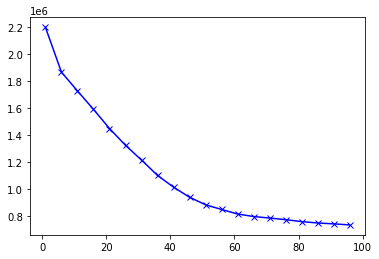

In [159]:
plt.plot(K,inertias, 'bx-')
plt.show()

In [163]:
kmeans=KMeans(n_clusters=45, random_state=0).fit(pca_data)